# Assignment

## Instructions

Complete the following exercises using Python.

1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# Generate 10,000 random samples of flipping 3 coins using np.random.binomial()
n, p, size = 3, 0.5, 10000
samples = np.random.binomial(n, p, size)

/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


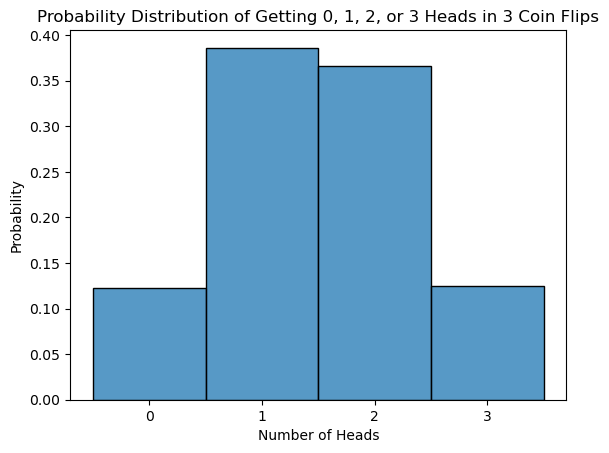

In [3]:
# Plot the probability distribution of getting 0, 1, 2, or 3 heads
sns.histplot(samples, bins=np.arange(-0.5, 4.5, 1), stat='probability', kde=False)
plt.xticks([0, 1, 2, 3])
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of Getting 0, 1, 2, or 3 Heads in 3 Coin Flips')
plt.show()

In [4]:
# Calculate the expected value (mean) of your distribution
mean = np.mean(samples)
print(f'Expected Value (Mean): {mean}')

Expected Value (Mean): 1.4926


In [5]:
# Compare your empirical results with the theoretical probability for each outcome 
theoretical_probs = [st.binom.pmf(k, n, p) for k in range(n + 1)]
print(f'Theoretical Probabilities: {theoretical_probs}')

Theoretical Probabilities: [0.12499999999999999, 0.3750000000000001, 0.3750000000000001, 0.125]


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

In [6]:
# Generate Sample A (100 values, mean=70, std=5) and Sample B (100 values, mean=73, std=5) from normal distributions
sample_a = np.random.normal(70, 5, 100)
sample_b = np.random.normal(73, 5, 100)

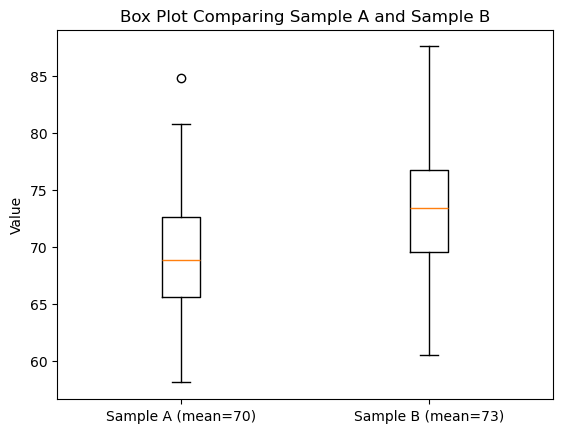

In [10]:
# Create a box plot comparing the two distributions
data = [sample_a, sample_b]
plt.boxplot(data, labels=['Sample A (mean=70)', 'Sample B (mean=73)'])
plt.ylabel('Value')
plt.title('Box Plot Comparing Sample A and Sample B')
plt.show()

In [ ]:
# Conduct an independent t-test to check if the means are significantly different
t_stat, p_value = st.ttest_ind(sample_a, sample_b)
print(f'T-test statistic: {t_stat}, P-value: {p_value}')
print(f'The means are {"significantly different" if p_value < 0.05 else "not significantly different"} at the 0.05 significance level.')

T-test statistic: -5.585012540976762, P-value: 7.644241166659877e-08
The means are significantly different at the 0.05 significance level.


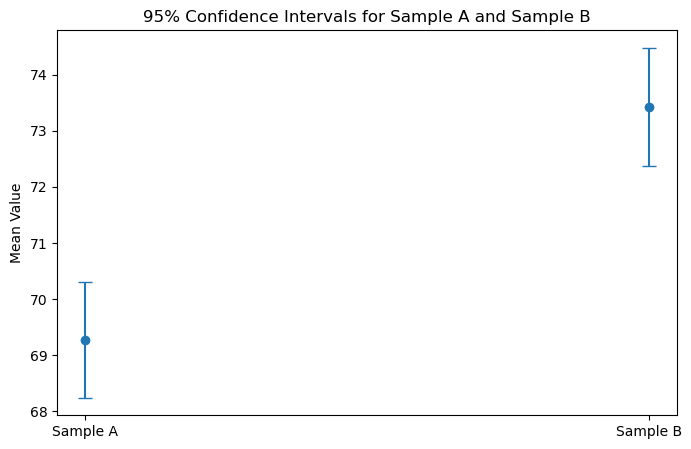

In [13]:
# Calculate and visualize the 95% confidence intervals for both samples
conf_int_a = st.t.interval(0.95, len(sample_a)-1, loc=np.mean(sample_a), scale=st.sem(sample_a))
conf_int_b = st.t.interval(0.95, len(sample_b)-1, loc=np.mean(sample_b), scale=st.sem(sample_b))

plt.figure(figsize=(8, 5))
plt.errorbar(['Sample A', 'Sample B'], [np.mean(sample_a), np.mean(sample_b)],
             yerr=[(conf_int_a[1]-conf_int_a[0])/2, (conf_int_b[1]-conf_int_b[0])/2],
             fmt='o', capsize=5)
plt.title('95% Confidence Intervals for Sample A and Sample B')
plt.ylabel('Mean Value')
plt.show()

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

In [14]:
# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Analyze Sepal Length and Petal Length

/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

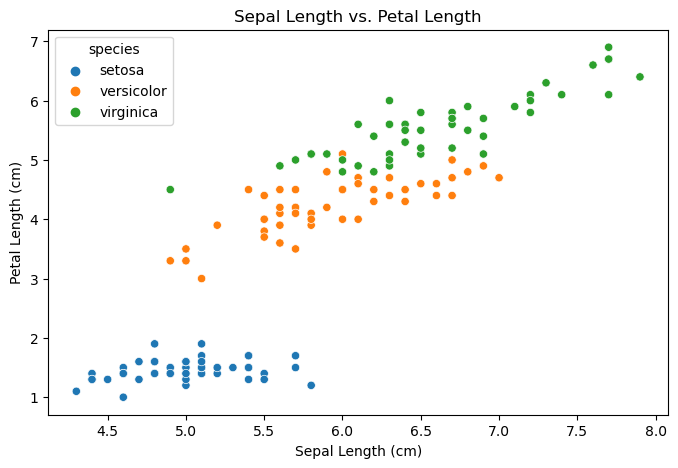

In [15]:
# Create a scatter plot for sepal length vs. petal length
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [16]:
# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = st.pearsonr(iris['sepal_length'], iris['petal_length'])
print(f'Pearson correlation coefficient: {corr_coef}, P-value: {p_value}')
print(f'There is {"a significant" if p_value < 0.05 else "no significant"} correlation between sepal length and petal length at the 0.05 significance level.')  

Pearson correlation coefficient: 0.8717537758865831, P-value: 1.0386674194498827e-47
There is a significant correlation between sepal length and petal length at the 0.05 significance level.


In [17]:
# Calculate and interpret the R-squared value
r_squared = corr_coef ** 2
print(f'R-squared value: {r_squared}')
print(f'The R-squared value of {r_squared} indicates that approximately {r_squared*100:.2f}% of the variance in petal length can be explained by sepal length.')
    

R-squared value: 0.7599546457725149
The R-squared value of 0.7599546457725149 indicates that approximately 76.00% of the variance in petal length can be explained by sepal length.


### Analyze Sepal Width and Petal Width

/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jefflee/Applications/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

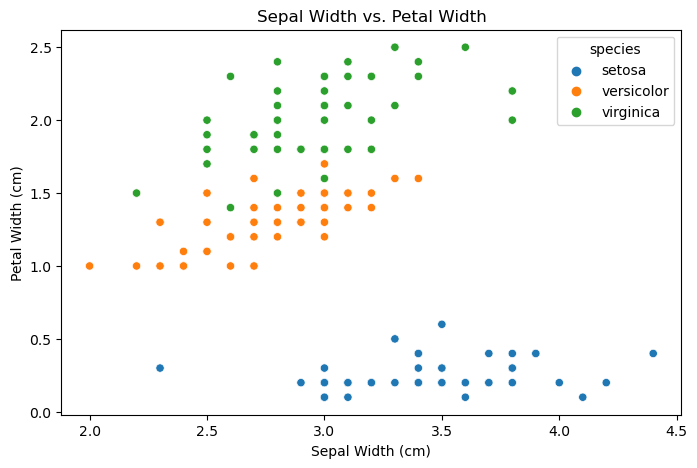

Pearson correlation coefficient (Sepal Width vs. Petal Width): -0.36612593253643905, P-value: 4.0732285132462e-06
There is a significant correlation between sepal width and petal width at the 0.05 significance level.


In [19]:
# Create a scatter plot for sepal width vs. petal width
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species')
plt.title('Sepal Width vs. Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()
# Calculate the Pearson correlation coefficient and p-value
corr_coef_sw_pw, p_value_sw_pw = st.pearsonr(iris['sepal_width'], iris['petal_width'])
print(f'Pearson correlation coefficient (Sepal Width vs. Petal Width): {corr_coef_sw_pw}, P-value: {p_value_sw_pw}')
print(f'There is {"a significant" if p_value_sw_pw < 0.05 else "no significant"} correlation between sepal width and petal width at the 0.05 significance level.')

In [20]:
# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = st.pearsonr(iris['sepal_length'], iris['petal_length'])
print(f'Pearson correlation coefficient: {corr_coef}, P-value: {p_value}')
print(f'There is {"a significant" if p_value < 0.05 else "no significant"} correlation between sepal length and petal length at the 0.05 significance level.')  

Pearson correlation coefficient: 0.8717537758865831, P-value: 1.0386674194498827e-47
There is a significant correlation between sepal length and petal length at the 0.05 significance level.


In [22]:
# Calculate and interpret the R-squared value
r_squared = corr_coef ** 2
print(f'R-squared value: {r_squared}')
print(f'The R-squared value of {r_squared} indicates that approximately {r_squared*100:.2f}% of the variance in petal length can be explained by sepal length.')    

R-squared value: 0.7599546457725149
The R-squared value of 0.7599546457725149 indicates that approximately 76.00% of the variance in petal length can be explained by sepal length.


In [23]:
# Compare which pair shows a stronger relationship and explain why
if abs(corr_coef) > abs(corr_coef_sw_pw):
    print('Sepal length and petal length show a stronger relationship.')
else:
    print('Sepal width and petal width show a stronger relationship.')  
    

Sepal length and petal length show a stronger relationship.


## Submission

- Submit the URL of the GitHub Repository that contains your work to NTU black board.
- Should you reference the work of your classmate(s) or online resources, give them credit by adding either the name of your classmate or URL.